## AirBnB Analysis

## Objective 1: Data Prep & QA

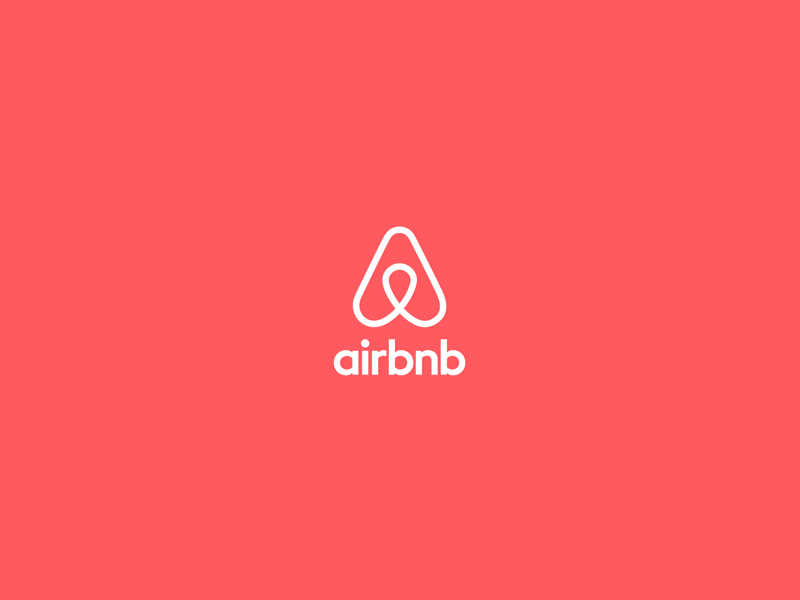

In [197]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/Users/tetianabovanenko/Desktop/image_processing20200401-19001-nzr3xk.gif'))

In [34]:
import pandas as pd
listings = pd.read_csv('/Users/tetianabovanenko/Downloads/Airbnb Data/Listings.csv', 
                       low_memory=False, 
                       encoding='ISO-8859-1', 
                       parse_dates=['host_since'])
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [36]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [83]:
listings.columns.tolist()

['listing_id',
 'name',
 'host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'district',
 'city',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bedrooms',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable']

In [44]:
# Filter rows where the city is 'Paris' and select the desired columns
paris_listings = (
    listings
    .query("city.str.lower() == 'paris'", engine='python')
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)

paris_listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [46]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [67]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [69]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [80]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

## Objective 2: Prepare the data for visualization

In [93]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood', as_index=False)  # Group by neighbourhood
    .agg(mean_price=('price', 'mean'))  # Calculate mean price
    .sort_values(by='mean_price', ascending=True)  # Sort by mean price
)
paris_listings_neighbourhood.tail()


,neighbourhood,mean_price
10,Menilmontant,74.942257
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.209479
17,Reuilly,89.058402
16,Popincourt,90.559459


In [155]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [215]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood" : "count",
        "price" : "mean"})
)


paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


## Objective 3: Vizualize the data 

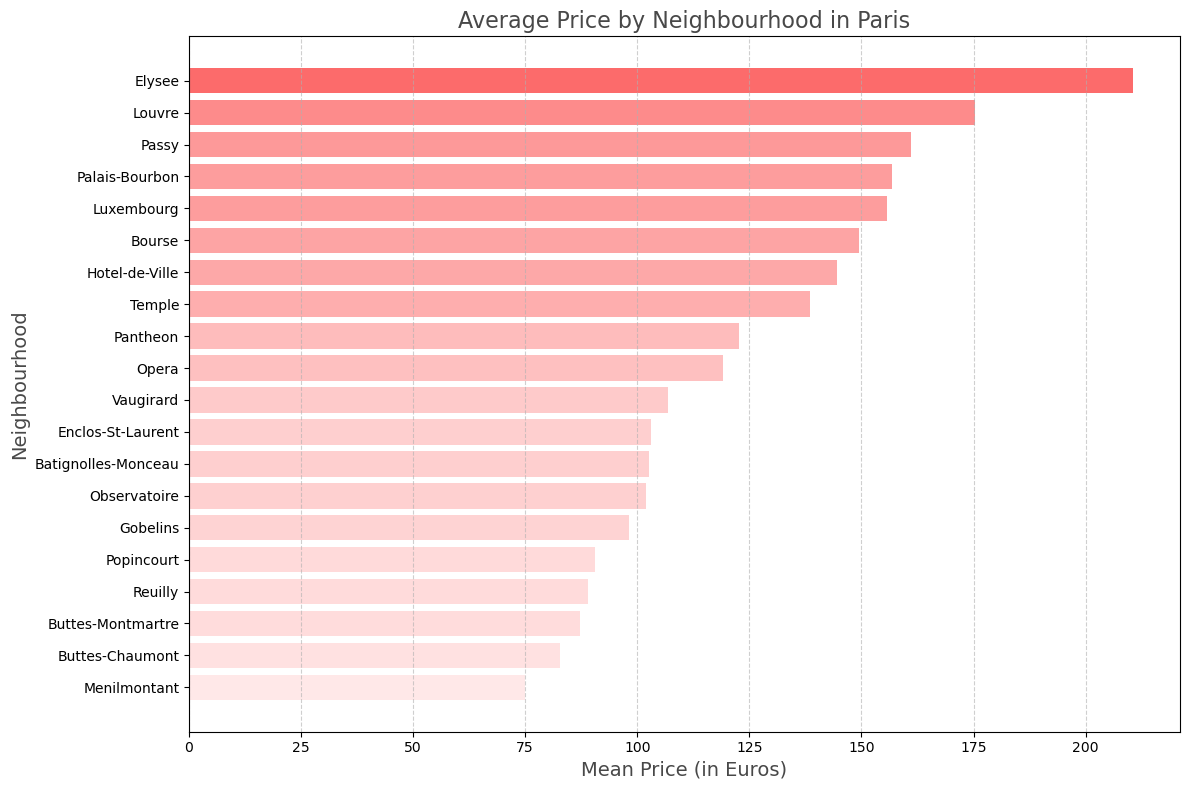

In [217]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Sort the data by mean price for better visualization
paris_listings_neighbourhood_sorted = paris_listings_neighbourhood.sort_values(by="mean_price", ascending=True)

# Normalize mean prices to create a gradient effect
norm = plt.Normalize(paris_listings_neighbourhood_sorted['mean_price'].min(), 
                     paris_listings_neighbourhood_sorted['mean_price'].max())

# Create a custom colormap transitioning from light pink to Airbnb coral red
colors = ['#ffe6e6', '#fc5b5b']  # Light pink to coral red
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_airbnb", colors)

# Generate gradient colors based on the colormap and normalized mean price
gradient_colors = custom_cmap(norm(paris_listings_neighbourhood_sorted['mean_price']))

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))  # Set the figure size
bars = plt.barh(
    paris_listings_neighbourhood_sorted['neighbourhood'],  # Neighbourhoods on y-axis
    paris_listings_neighbourhood_sorted['mean_price'],  # Mean price on x-axis
    color=gradient_colors,  # Apply the gradient colors
    alpha=0.9  # Slight transparency for smoothness
)

# Add chart title and axis labels
plt.title("Average Price by Neighbourhood in Paris", fontsize=16, color="#484848")
plt.xlabel("Mean Price (in Euros)", fontsize=14, color="#484848")
plt.ylabel("Neighbourhood", fontsize=14, color="#484848")

# Add gridlines for better readability
plt.grid(axis="x", linestyle="--", alpha=0.6, color="#B0B0B0")

# Adjust layout for a clean look
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

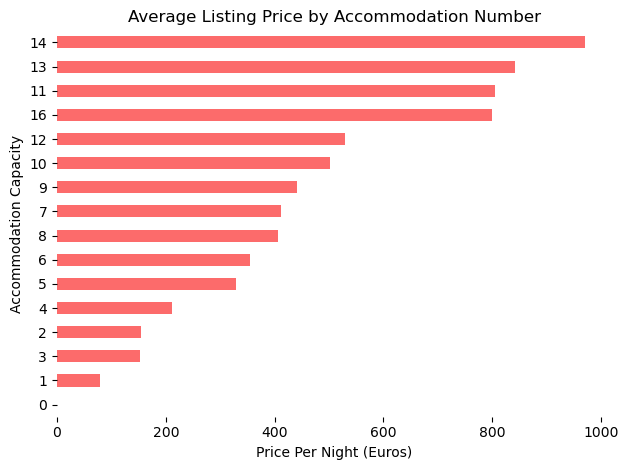

In [218]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

(paris_listings_accommodates
 .plot.barh(
     title="Average Listing Price by Accommodation Number",  # Title of the chart
     xlabel="Price Per Night (Euros)",  # Label for x-axis
     ylabel="Accommodation Capacity",  # Label for y-axis
     legend=None,  # No legend is required
     color="#fc5b5b",  # Airbnb coral red color for the bars
     alpha=0.9  # Slight transparency for softer aesthetics
 )
)


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


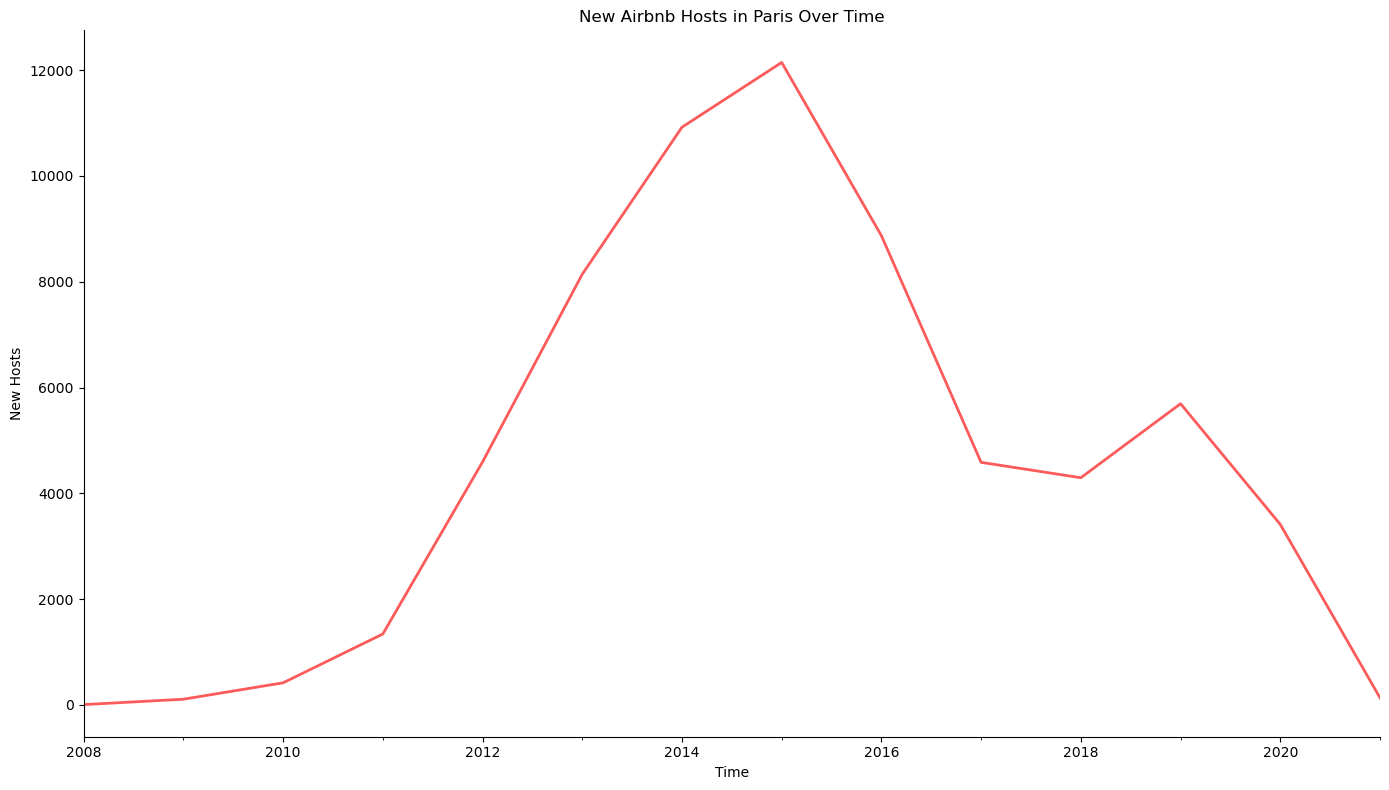

In [219]:
plt.figure(figsize=(14, 8))  # Set figure size for better readability


paris_listings_over_time["neighbourhood"].plot(
    kind="line",  # Use a line plot
    linewidth=2,  # Set line thickness
    color="#fc5b5b",  # Airbnb coral red for the line
    title="New Airbnb Hosts in Paris Over Time",  # Chart title
    ylabel="New Hosts",  # Y-axis label
    xlabel="Time"  # X-axis label
)


sns.despine()
plt.tight_layout()
plt.show()

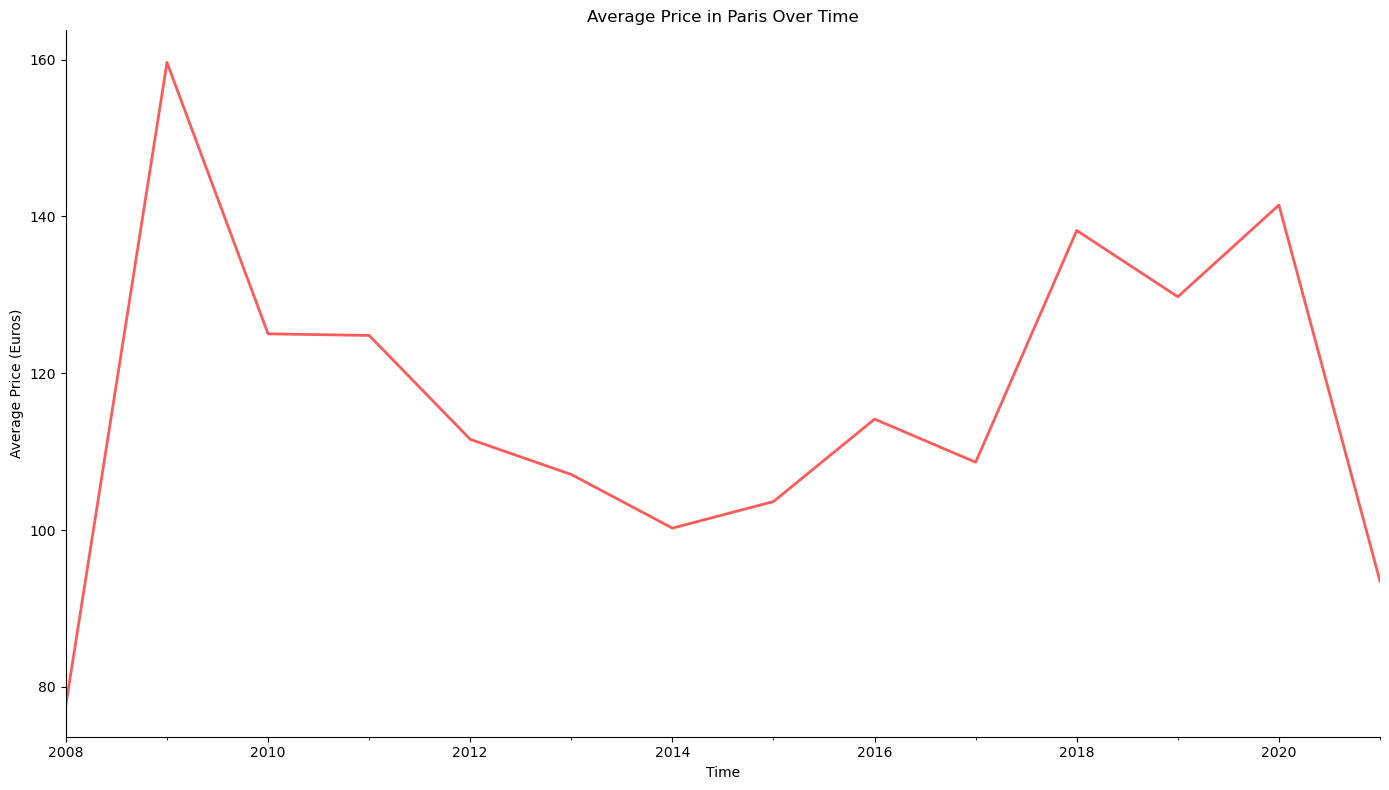

In [220]:
plt.figure(figsize=(14, 8))  # Set figure size for better readability


paris_listings_over_time["price"].plot(
    kind="line",  # Use a line plot
    linewidth=2,  # Set line thickness
    color="#fc5b5b",  # Airbnb coral red for the line
    title="Average Price in Paris Over Time",  # Chart title
    ylabel="Average Price (Euros)",  # Y-axis label
    xlabel="Time"
)


sns.despine()
plt.tight_layout()
plt.show()

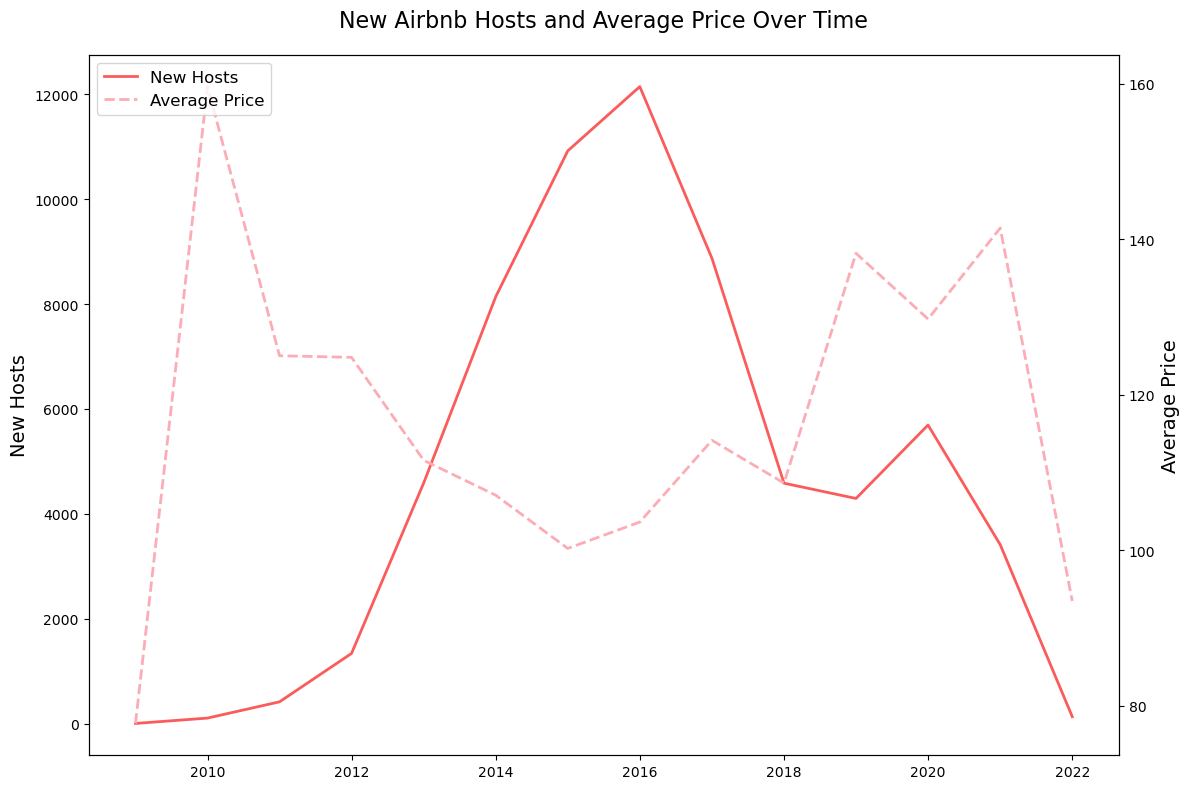

In [224]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))  # Set the figure size

# Plot the first line (New Hosts) on the primary y-axis
line1 = ax1.plot(
    paris_listings_over_time.index,  # X-axis data (Time)
    paris_listings_over_time["neighbourhood"],  # Y-axis data for new hosts
    color="#fc5b5b",  # Coral red color for the line
    label="New Hosts",  # Label for the line
    linewidth=2  # Line thickness
)[0]  # Extract the first (and only) element of the returned list

ax1.set_ylabel("New Hosts", fontsize=14, color="black")  # Label for primary y-axis
ax1.tick_params(axis="y", labelcolor="black")  # Keep y-axis tick labels black

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line (Average Price) on the secondary y-axis
line2 = ax2.plot(
    paris_listings_over_time.index,  # X-axis data (Time)
    paris_listings_over_time["price"],  # Y-axis data for average price
    color="#fcacb4",  # Light pink color for the line
    label="Average Price",  # Label for the line
    linewidth=2, linestyle="--"  # Dashed line style
)[0]  # Extract the first (and only) element of the returned list

ax2.set_ylabel("Average Price", fontsize=14, color="black")  # Label for secondary y-axis
ax2.tick_params(axis="y", labelcolor="black")  # Keep secondary y-axis tick labels black

# Add title and labels
plt.title("New Airbnb Hosts and Average Price Over Time", fontsize=16, pad=20, color="black")
plt.xlabel("Year", fontsize=14, color="black", labelpad=10)

# Add a combined legend
plt.legend(
    handles=[line1, line2],  # Lines to include in the legend
    labels=["New Hosts", "Average Price"],  # Labels for the lines
    loc="upper left",  # Position the legend
    fontsize=12  # Font size for the legend
)

# Adjust layout for a clean output
plt.tight_layout()

# Display the plot
plt.show()


# Conclusions

## Price Variation Across Neighborhoods:
- The analysis revealed significant differences in average prices across Paris neighborhoods.
- For example, some premium neighborhoods, such as **Elysee**, have notably higher average prices compared to others.
- This suggests that **location** is a critical factor influencing pricing, and hosts in these neighborhoods could leverage this for premium pricing strategies.

## Impact of Accommodation Capacity:
- Listings in **Elysee** show that properties accommodating more guests tend to have higher average prices.
- Hosts targeting larger groups can charge a premium, potentially focusing on properties with more beds or additional space.

## Trends Over Time:
- The number of new Airbnb hosts in Paris has been steadily increasing over time, indicating growing interest in short-term rentals.
- However, the average price trend shows **fluctuations**, suggesting seasonal or market-driven variations. This highlights the importance of **dynamic pricing strategies** to remain competitive.

## Correlation Between New Hosts and Prices:
- The dual-axis visualization indicates a potential relationship between the number of new hosts entering the market and changes in average prices.
- As new hosts join, **competition** may drive prices down in some periods, reinforcing the need for differentiation and competitive offerings.

## Visual and Analytical Insights:
- The visualization of price distributions and trends offers actionable insights for hosts and prospective investors.
  - Premium neighborhoods and higher accommodation capacity show clear opportunities for **maximizing returns**.
- Yearly trends underline the importance of understanding market cycles and adjusting pricing to meet demand.
